In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
# Reading the dataset
df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [40]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
# identify the data types
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [42]:
# identifying the missing values for all columns
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [43]:
# identify the unique values for all the columns
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [44]:
# encode the ExterQual with 0,1,2,3 and 4
df['ExterQual'] = df['ExterQual'].map({'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})


In [45]:
# encode the ExterCond with 0,1,2,3 and 4
df['ExterCond'] = df['ExterCond'].map({'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [46]:
# encode the BsmtQual with 0,1,2,3,4 and 5
df['BsmtQual'] = df['BsmtQual'].map({'NA':5 ,'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [47]:
# encode the BsmtCond with 0,1,2,3,4 and 5
df['BsmtCond'] = df['BsmtCond'].map({'NA':5 ,'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [48]:
# encode BsmtExposure with 0,1,2,3,4 and 5
df['BsmtExposure'] = df['BsmtExposure'].map({'NA':5 ,'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [49]:
# encode BsmtFinType1 with 0,1,2,3,4,5 and 6
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':6 ,'Unf':5, 'LwQ':4, 'Rec':3, 'BLQ':2, 'ALQ':1, 'GLQ':0})

In [50]:
# encode HeatingQC with 0,1,2,3,4 and 5
df['HeatingQC'] = df['HeatingQC'].map({'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [51]:
# encode CentralAir with 0 and 1
df['CentralAir'] = df['CentralAir'].map({'N':0, 'Y':1})

In [52]:
# encode KitchenQual with 0,1,2,3,4 and 5
df['KitchenQual'] = df['KitchenQual'].map({'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [53]:
# encode BsmtFinType2 with 0,1,2,3,4,5 and 6
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':6 ,'Unf':5, 'LwQ':4, 'Rec':3, 'BLQ':2, 'ALQ':1, 'GLQ':0})

In [54]:
# encode FireplaceQu with 0,1,2,3,4, and 5
df['FireplaceQu'] = df['FireplaceQu'].map({'NA':5 ,'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [55]:
# encode GarageQual with 0,1,2,3,4, and 5
df['GarageQual'] = df['GarageQual'].map({'NA':5 ,'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [56]:
# encode GarageCond with 0,1,2,3,4, and 5
df['GarageCond'] = df['GarageCond'].map({'NA':5 ,'Po':4, 'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

In [57]:
# encode PoolQC with 0,1,2,3, and 4
df['PoolQC'] = df['PoolQC'].map({'NA':4 ,'Fa':3, 'TA':2, 'Gd':1, 'Ex':0})

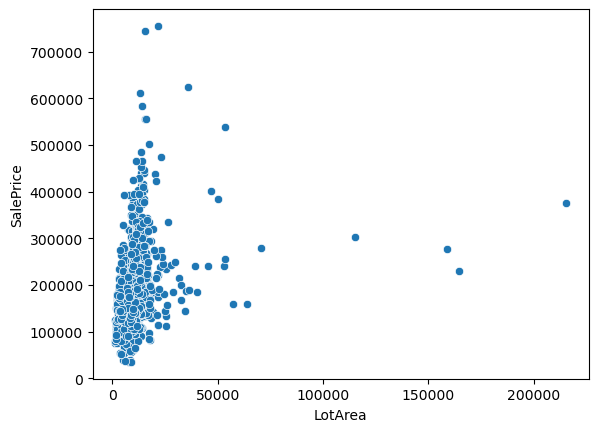

In [58]:
# draw a scatter plot
sns.scatterplot(x='LotArea', y='SalePrice', data=df) # scatter plot of LotArea and SalePrice
plt.show() 

In [59]:
# drop the columns Id and Lotshape
df = df.drop(['Id', 'LotShape'], axis=1)

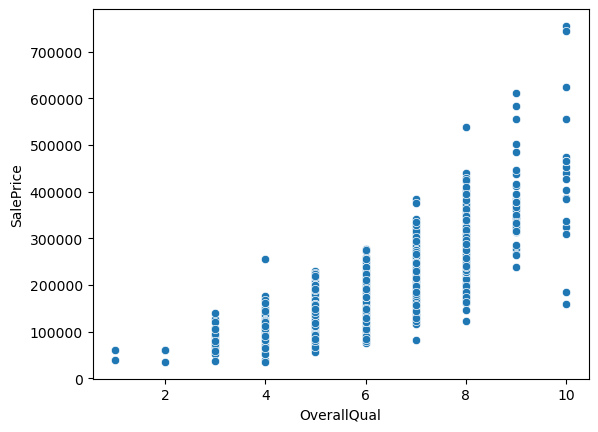

In [60]:
# draw a scatter plot of overallQual and SalePrice
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.show()

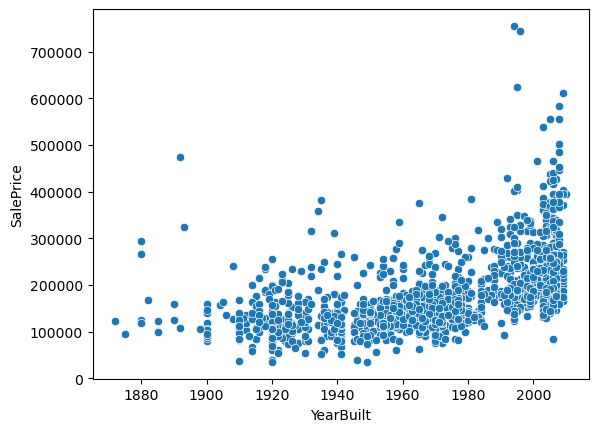

In [61]:
# draw a scatter plot of YearBuilt and SalePrice
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df)
plt.show()

In [62]:
# identify the unique values for year built
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [63]:
# identify the unique values for year sold
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [64]:
# identify the unique values for all the columns
df.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 79, dtype: int64

In [65]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 79, dtype: object

In [66]:
# draw a scatterplot for all numeric columns and SalePrice
sns.pairplot(df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']])
plt.show()

c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Vishaly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o